# Tarea realizada por Jesús Martínez Leal
Última edición: 11/02/2024

# PCA 

In [40]:
#NumPy: numerical scientific computing 
import numpy as np

#Scikit-learn: machine learning
from sklearn.decomposition import PCA

#Matplotlib: plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

#SciPy: scientific tools
import scipy.io.matlab as matlab


# 'Guess data' 

Los datos del archivo `guess_data.mat` esconden una imagen entre una nube de ruido gaussiano. El objetivo de la práctica es encontrar esta imagen escondida. Para ello utilizaremos la PCA, como técnica de denoising. Dado que el ruido introducido tiene una varianza menor que la imagen escondida, podemos utilizar la PCA para discernir las direcciones de menor varianza y eliminarlas. Como sabemos que la imagen es tridimensional, quedándonos con las tres dimensiones con mayor varianza deberíamos encontrar la imagen, ya que el ruido ha sido introducido en nuevas componentes y una descomposición lineal es suficiente para hacer este denoising.

La varianza es una medida de cuánto se "esparcen" los puntos en una determinada dirección. Una varianza alta significa que los puntos están bastante dispersos en esta, mientras que una baja implica lo contrario (estar más concentrados).

Cuando se conservan las componentes principales con mayor varianza, estamos reteniendo la información que contribuye más significativamente a la estructura de los datos.

In [41]:
# Lectura de fichero de Matlab .mat
mat_file =  "guess_data.mat"
mat = matlab.loadmat(mat_file,squeeze_me=True) #devuelve un dictionary

# Lectura de los datos
X = mat["x"]   
del mat

X.shape

(1981, 200)

En primer lugar, vamos a ver un poco cómo son nuestros datos en un plot 3D (cogemos las 3 primeras componentes).

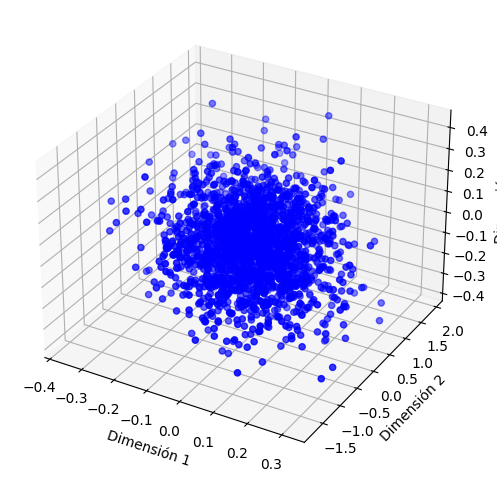

In [42]:
#Exploracion visual de los datos (3D)

fig = plt.figure(figsize = (14, 6))
ax = fig.add_subplot(111, projection = '3d')

# Cogemos las 3 primeras dimensiones para la visualización, aunque esto no es muy indicativo

x_dim1 = X[:, 0]
x_dim2 = X[:, 1]
x_dim3 = X[:, 2]
 
ax.scatter(x_dim1, x_dim2, x_dim3, c = 'b', marker = 'o')

ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_zlabel('Dimensión 3', rotation = 90, va = 'top')

plt.show()

Pasamos ahora a calcular la ``PCA`` de nuestro conjunto de datos y a graficar información sobre la varianza explicada por las diferentes componentes principales.

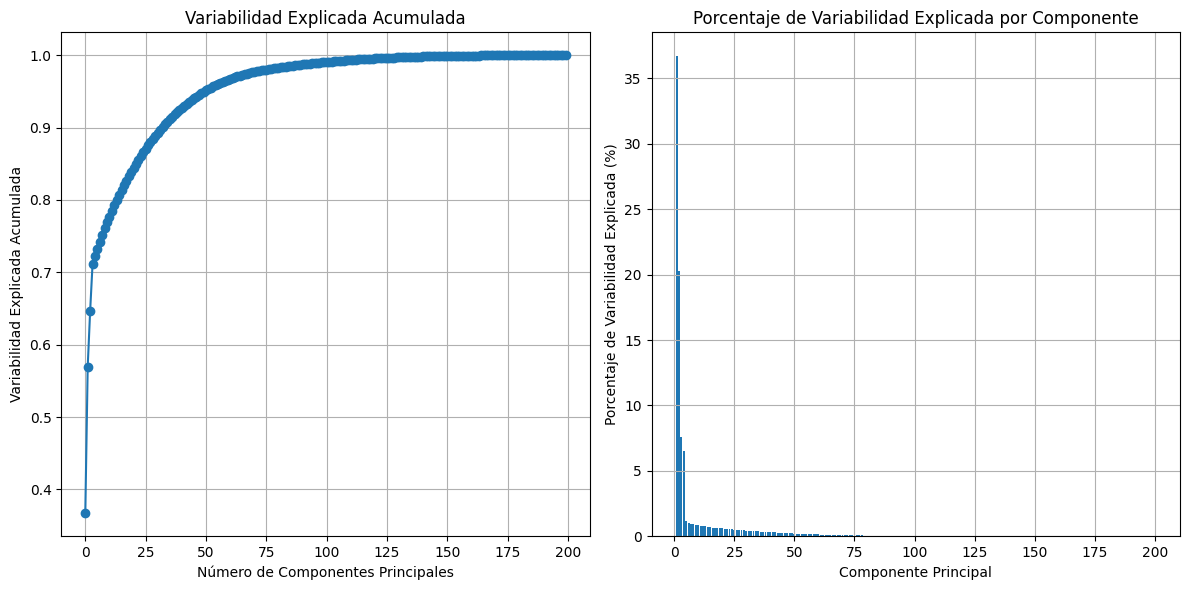

In [43]:
# Calcular PCA

pca = PCA()
pca.fit(X)

# Obtener la variabilidad explicada y porcentaje
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la variabilidad explicada por cada componente

plt.figure(figsize=(12, 6))

# Gráfico 1: Variabilidad explicada acumulada

plt.subplot(1, 2, 1)
explained_variance_ratio_cumsum = np.cumsum(explained_variance_ratio) # suma cumulativa de varianza explicada según número de componentes
plt.plot(explained_variance_ratio_cumsum, marker='o')
plt.title('Variabilidad Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Variabilidad Explicada Acumulada')
plt.grid(True)

# Gráfico 2: Porcentaje de variabilidad explicada por cada componente

plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100)
plt.title('Porcentaje de Variabilidad Explicada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Porcentaje de Variabilidad Explicada (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

Con un número de componentes igual a 30 obtenemos alrededor de un 90% de la variabilidad explicada.

Pasamos a transformar nuestros datos originales según las direcciones que marca la PCA.

In [44]:
Y = pca.fit_transform(X)

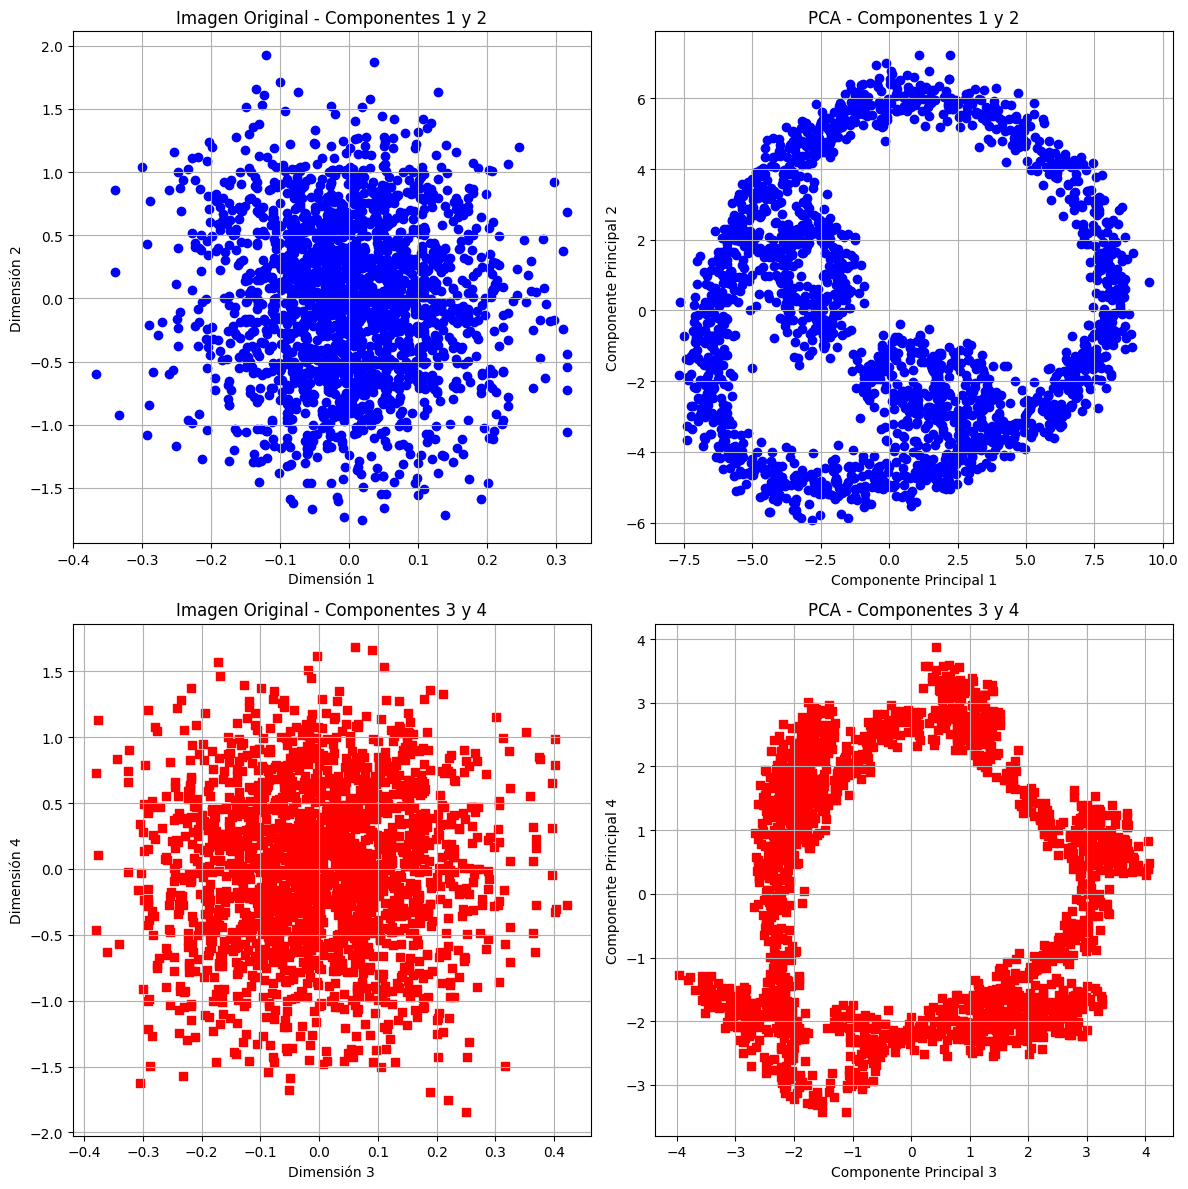

In [48]:
plt.figure(figsize=(12, 12))

# Subplot 1: Componentes 1 y 2

plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o')
plt.title('Imagen Original - Componentes 1 y 2')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)

# Subplot 2: Componentes 1 y 2 (PCA)

plt.subplot(2, 2, 2)
plt.scatter(Y[:, 0], Y[:, 1], c='b', marker='o')
plt.title('PCA - Componentes 1 y 2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)

# Subplot 3: Componentes 3 y 4

plt.subplot(2, 2, 3)
plt.scatter(X[:, 2], X[:, 3], c='r', marker='s')
plt.title('Imagen Original - Componentes 3 y 4')
plt.xlabel('Dimensión 3')
plt.ylabel('Dimensión 4')
plt.grid(True)

# Subplot 4: Componentes 3 y 4 (PCA)
plt.subplot(2, 2, 4)
plt.scatter(Y[:, 2], Y[:, 3], c='r', marker='s')
plt.title('PCA - Componentes 3 y 4')
plt.xlabel('Componente Principal 3')
plt.ylabel('Componente Principal 4')
plt.grid(True)

plt.tight_layout()
plt.show()


¡Hemos descubierto al alienígena y al pingüino!